# Домашнее задание №1

Задание выполнил(а): Олег Голещихин

__Дата выдачи:__ 19.12.2020

__Дедлайн:__ 27.12.2020 23:59

# О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками `numpy`, `pandas` и `matplotlib`.

### Оценивание и штрафы

Каждое из 14 заданий весит 1 бал:
#### Numpy
* [Задание 1](#task1) [1 бал]
* [Задание 2](#task2) [1 бал]
* [Задание 3](#task3) [1 бал]
* [Задание 4](#task4) [1 бал]
* [Задание 5](#task5) [1 бал]

#### Pandas
* [Задание 6](#task6) [1 бал]
* [Задание 7](#task7) [1 бал]
* [Задание 8](#task8) [1 бал]
* [Задание 9](#task9) [1 бал]
* [Задание 10](#task10) [1 бал]
* [Задание 11](#task11) [1 бал]
* [Задание 12](#task12) [1 бал]

#### Matplotlib
* [Задание 13](#task13) [1 бал]
* [Задание 14](#task14) [1 бал]


Итоговая оценка за домашнюю работу вычисляется по формуле: $$s \cdot \frac{10}{14},$$ где $s$ - сумма набранных балов.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.25 балла в день (от оценки в 10 бальной шкале), но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

```TBA```
<!-- Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Для доступа к курсу вам нужно зарегистрироваться в системе, войти в свой профиль, найти раздел "Активация инвайтов на курсы" и ввести инвайт `lInNu4j` -->

## Часть 1. Numpy

In [1]:
import numpy as np

Во всех задачах этой части необходимо написать код решения внутри функции и проверить его работу на приведенных для вашего удобства тестах.

При решении задач можно использовать только библиотеку `numpy`. Запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде предполагается, что массив - это одномерный `numpy.array`, а матрица - это двумерный `numpy.array`. 

### Задание 1 <a id="task1"></a>

Создайте массив первых n нечетных натуральных чисел, записанных в порядке убывания. Например, если `n=5`, то ответом будет `array([9, 7, 5, 3, 1])`.

*Функции, которые могут пригодиться при решении: `.arange()`*

In [2]:
def first_even_numbers(n: int) -> np.array:
    arr = np.arange(2*n-1, 0, -2)
    return arr

In [3]:
assert np.allclose(first_even_numbers(5), np.array([9, 7, 5, 3, 1]))
assert np.allclose(first_even_numbers(1), np.array([1]))
assert np.allclose(first_even_numbers(10), np.array([19, 17, 15, 13, 11, 9, 7, 5, 3, 1]))

### Задание 2 <a id="task2"></a>

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

*Функции, которые могут пригодиться при решении: `.arange()`*

In [4]:
def change_array(array: np.array, number: int) -> np.array:
    ind = np.arange(0, array.shape[0]) % 3 != 0
    arr = array*ind + ~ind*number
    return arr

In [5]:
array1 = np.array([3, 5, 1, 0, -3, 22, 213436])
number1 = -111
assert np.allclose(change_array(array1, number1), np.array([-111, 5, 1, -111, -3, 22, -111]))

array2 = np.array([3, 14, 15, 92, 6])
number2 = 8
assert np.allclose(change_array(array2, number2), np.array([8, 14, 15, 8, 6]))

### Задание 3 <a id="task3"></a>

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

_Функции, которые могут пригодиться при решении: `.mean()`, `.std()`, `.nan_to_num()`_

In [6]:
def normalize(matrix: np.array) -> np.array:
    arr = np.nan_to_num((matrix - matrix.mean(axis=0)) / matrix.std(axis=0))
    return arr

In [7]:
matrix1 = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
assert np.allclose(
    normalize(matrix1),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

matrix2 = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])
assert np.allclose(
    normalize(matrix2),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

matrix3 = np.array([[0.1, 0.2, 0.3, 0.4], [0.1, 0.5, 0.6, 0.7]])
assert np.allclose(
    normalize(matrix3),
    np.array([[0, -1, -1, -1], [0, 1, 1, 1]])
)

C:\Users\Nobody\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


### Задание 4 <a id="task4"></a>

Напишите функцию, вычисляющую производную данного полинома. Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([12, 12, 0])`, соответствующий полиному $12x^2 + 12x$.

_Функции, которые могут пригодиться при решении: `.arange()`_

In [8]:
def derivative(coefs: np.array) -> np.array:
    arr = coefs[:-1]*np.arange(coefs.shape[0]-1, 0, -1)
    return arr

In [9]:
coefs1 = np.array([4, 6, 0, 1])
assert np.allclose(
    derivative(coefs1),
    np.array([12, 12, 0])
)

coefs2 = np.array([1, 7, -12, 21, -6])
assert np.allclose(
    derivative(coefs2),
    np.array([4, 21, -24, 21])
)

### Задание 5 <a id="task5"></a>

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

_Функции, которые могут пригодиться при решении: `.T`, `.identity()`, `.diagonal`_

In [10]:
def make_symmetric(matrix: np.array) -> np.array:
    mx = matrix + (matrix - np.identity(matrix.shape[0])*np.diagonal(matrix)).T
    return mx

In [11]:
matrix1 = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])
assert np.allclose(
    make_symmetric(matrix1),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

matrix2 = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])
assert np.allclose(
    make_symmetric(matrix2),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

## Часть 2. Pandas

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

### Задание 6 <a id="task6"></a>

Откройте в ноутбуке файл с данными (["train.csv"](https://raw.githubusercontent.com/AKuzina/ml_dpo/main/hw/train.csv)). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [13]:
# your code here
dta = pd.read_csv('train.csv')
dta.shape

(891, 12)

In [14]:
dta.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
dta.tail(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Задание 7 <a id="task7"></a>

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [16]:
per_survived = dta['Survived'].sum()/dta.shape[0]
per_survived_m = dta[(dta['Sex'] == 'male')]['Survived'].sum()/dta['Survived'].sum()
per_survived_w = dta[(dta['Sex'] == 'female')]['Survived'].sum()/dta['Survived'].sum()
print('Доля выживших после крушения пассажиров:', per_survived)
print('Доля выживших мужчин:', per_survived_m)
print('Доля выживших женщин:', per_survived_w)

Доля выживших после крушения пассажиров: 0.3838383838383838
Доля выживших мужчин: 0.31871345029239767
Доля выживших женщин: 0.6812865497076024


### Задание 8 <a id="task8"></a>

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне.

In [17]:
min_fare = dta['Fare'].min()
mean_fare = dta['Fare'].mean()
max_fare = dta['Fare'].max()
print('Минимальная стоимость билета:', min_fare)
print('Средняя стоимость билета:', mean_fare)
print('Максимальная стоимость билета:', max_fare)

Минимальная стоимость билета: 0.0
Средняя стоимость билета: 32.2042079685746
Максимальная стоимость билета: 512.3292


In [18]:
min_fare_s = dta[(dta['Embarked']=='S')]['Fare'].min()
mean_fare_s = dta[(dta['Embarked']=='S')]['Fare'].mean()
max_fare_s = dta[(dta['Embarked']=='S')]['Fare'].max()
print('Минимальная стоимость билета (Саутгемпот):', min_fare_s)
print('Средняя стоимость билета (Саутгемпот):', mean_fare_s)
print('Максимальная стоимость билета (Саутгемпот):', max_fare_s)

Минимальная стоимость билета (Саутгемпот): 0.0
Средняя стоимость билета (Саутгемпот): 27.07981180124218
Максимальная стоимость билета (Саутгемпот): 263.0


### Задание 9 <a id="task9"></a>

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [19]:
dta.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Как видно, в столбце "Cabin" пропущено более 70% всех значений, поэтому он не несет практически никакой полезной информации.

In [20]:
dta = dta.drop(['Cabin'], axis=1)
dta.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Задание 10 <a id="task10"></a>

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [21]:
dta.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

В столбце "Age" пропущено 177 значений, в столбце "Ebarked" пропущено 2 значения.

### Задание 11 <a id="task11"></a>

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

В столбце "Age" представлены целочисленные данные. Заполним пропуски средними значениями. В столбце "Embarked" - категориальные данные. Заполним пропуски модой.

In [22]:
age_input = dta['Age'].mean()
embarked_input = dta['Embarked'].mode()[0]
dta['Age'] = dta['Age'].fillna(age_input)
dta['Embarked'] = dta['Embarked'].fillna(embarked_input)
dta.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Задание 12 <a id="task12"></a>

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. 

In [23]:
dta['Num_relatives'] = dta['SibSp'] + dta['Parch'] + 1
dta.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Num_relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


# Часть 3. Matplotlib

### Задание 13 <a id="task13"></a>

Отобразите гистограмму распределения возрастов для каждого класса пассажиров. В результате вы должны получить три гистограммы, которые необходимо отобразить друг рядом с другом, используя функцию [`plt.subplots`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html).

* Обратите внимание на параметры `figsize`, `sharey` функции `plt.subplots` 
* Используйте функции `set_xlabel`, `set_ylabel`, `set_title` чтобы добавить подписи осей и названия графикам
* Для построения гистограммы используйте функуию [`hist`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)
* Каждая гистограмма должна быть нормирована (полезными могут оказаться параметры `density`)


В итоге ваш график должен выглядеть примерно так

![](plot_13.png)

Text(0.5, 0, 'Age')

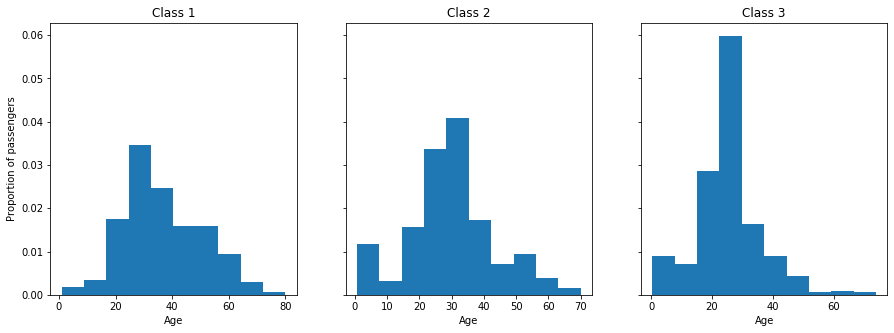

In [24]:
f, ax = plt.subplots(ncols=3, sharey=True, figsize=(15, 5))

ax[0].hist(dta[(dta['Pclass']==1)]['Age'], density=True)
ax[0].set_title('Class 1')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Proportion of passengers')

ax[1].hist(dta[(dta['Pclass']==2)]['Age'], density=True)
ax[1].set_title('Class 2')
ax[1].set_xlabel('Age')

ax[2].hist(dta[(dta['Pclass']==3)]['Age'], density=True)
ax[2].set_title('Class 3')
ax[2].set_xlabel('Age')

### Задание 14 <a id="task14"></a>

Постройте диаграмму рассеяния (scatter plot) для пассажиров. Ось x должна обозначать возраст пассажира, ось y - стоимость его проезда. 

* Обозначьте выживших и погибших пассажиров (`Survived`) разными цветами (аргумент `c` функции `scatter`) и маркерами (аргумент `c` функции `marker`). 
* Также укажите на графике легенду (функция [`plt.legend`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html))
* Используйте аргумент `fontsize`, чтобы регулировать размер шрифта в подписях

В итоге ваш график должен выглядеть примерно так

![](plot_14.png)

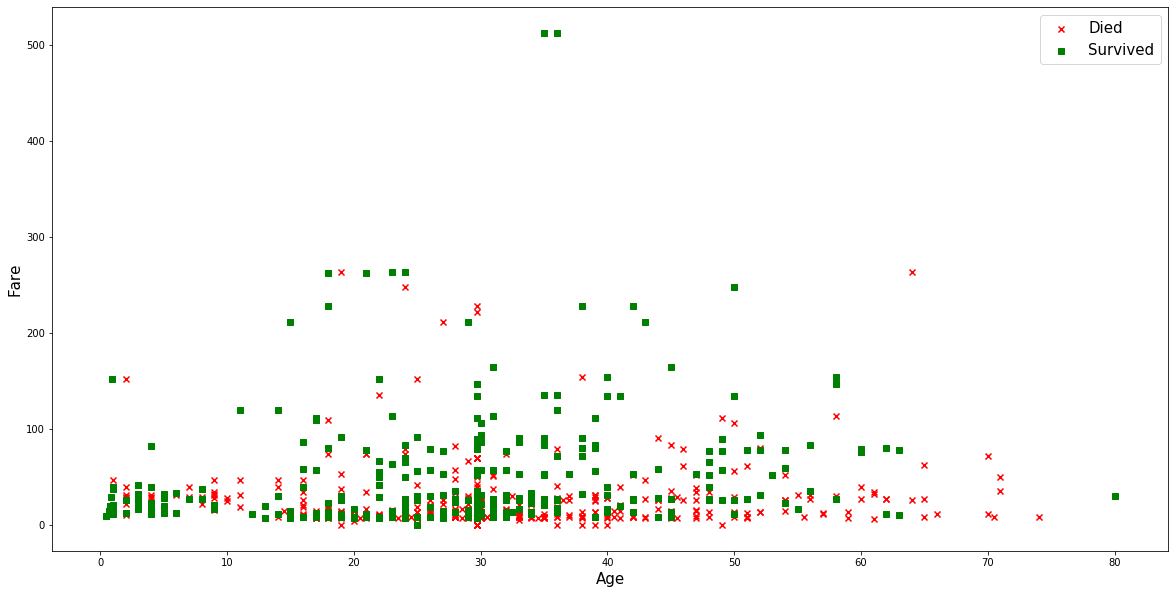

In [25]:
f, ax = plt.subplots(figsize=(20, 10))

ax.scatter(x=dta[(dta['Survived']==0)]['Age'], y=dta[(dta['Survived']==0)]['Fare'], c='Red', marker='x', label='Died')
ax.scatter(x=dta[(dta['Survived']==1)]['Age'], y=dta[(dta['Survived']==1)]['Fare'], c='Green', marker='s', label='Survived')
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Fare', fontsize=15)
plt.legend(fontsize=15)